In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from scipy.optimize import curve_fit, fixed_point

In [3]:
import matplotlib.patches as patches

In [4]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[plt.get_cmap('Dark2')(a) for a in np.arange(0.,0.9,0.12)][::-1]) 

In [45]:
fig_width_pt = 123  # Get this from LaTeX using \showthe\columnwidth
                      # For PRL columnwidth is 246pt.
golden_mean = (np.sqrt(5)+1.0)/2.0         # Aesthetic ratio

fig_height_pt = fig_width_pt
inches_per_pt = 1.0/72.27               # Convert pt to inch
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_height_pt*inches_per_pt      # height in inches
fig_size =  [fig_width,fig_height]
params = {'backend': 'ps',
          'axes.labelsize': 12,
          'font.size': 12,
          'xtick.labelsize': 10,
          'xtick.direction': 'out',
          'ytick.labelsize': 10,
          'ytick.direction': 'out',
          'ytick.major.pad': 1,
          'xtick.major.pad': 1,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'legend.frameon': False,
          'legend.fancybox': False}
plt.rcParams.update(params)

In [39]:
list_beta=np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0])
list_beta2=np.array([1.08, 1.13, 1.15, 1.18, 1.23, 1.25])

In [40]:
speedfront={}
speedback={}
speedcomet={}
frontdens={}
 
for beta in list_beta:
    try:
        data=pd.read_csv('data_speeds/beta%.1f/dx0.1/f_out.dat'%(beta), sep=' ', names=['t', 'frontpos', 'backpos', 'cometpos', 'frontdens'])
        speedfront[beta]=np.polyfit(data.t[20:500], data.frontpos[20:500], deg=1)[0]
        speedback[beta]=np.polyfit(data.t[20:500], data.backpos[20:500], deg=1)[0]
        speedcomet[beta]=np.polyfit(data.t[20:500], data.cometpos[20:500], deg=1)[0]
        frontdens[beta]=np.mean(data.frontdens.values[-50:])
    except: 
        pass
    
for beta in list_beta2:
    try:
        data=pd.read_csv('data_speeds/beta%.2f/dx0.1/f_out.dat'%(beta), sep=' ', names=['t', 'frontpos', 'backpos', 'cometpos', 'frontdens'])
        speedfront[beta]=np.polyfit(data.t[20:500], data.frontpos[20:500], deg=1)[0]
        speedback[beta]=np.polyfit(data.t[20:500], data.backpos[20:500], deg=1)[0]
        speedcomet[beta]=np.polyfit(data.t[20:500], data.cometpos[20:500], deg=1)[0]
        frontdens[beta]=np.mean(data.frontdens.values[-50:])
    except: 
        pass

In [53]:
dx=0.1
list_beta_plot=np.sort(np.concatenate((list_beta, list_beta2)))
speedfront_plot=-np.array([speedfront[beta]*dx for beta in list_beta_plot])
speedback_plot=-np.array([speedback[beta]*dx for beta in list_beta_plot])
speedcomet_plot=-np.array([speedcomet[beta]*dx for beta in list_beta_plot])

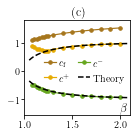

In [90]:
xlab=0.45
ylab=1.05
ms=3.5
lw=1.2

plt.text(s=r'$\mathrm{(c)}$', x=xlab, y=ylab, transform=plt.gca().transAxes)

plt.plot(list_beta_plot, speedfront_plot, 'o-', label=r'$c_{\rm f}$', markersize=ms, linewidth=lw)
plt.plot(list_beta_plot, speedback_plot, 'o-', label=r'$c^+$', markersize=ms, linewidth=lw)

plt.plot(list_beta_plot, speedcomet_plot, 'o-', label=r'$c^-$', markersize=ms, linewidth=lw)


vec_beta=np.linspace(1.05, 2.1)
fp_beta=np.array([fixed_point(lambda x: np.tanh(beta*x), 0.5) for beta in vec_beta])
plt.plot(vec_beta, fp_beta, 'k--')
plt.plot(vec_beta, -fp_beta, 'k--', label=r'$\mathrm{Theory}$')

l=plt.legend(fontsize=10, handletextpad=0.3, handlelength=1.2, ncol=2, columnspacing=0.8, loc=(0.15, 0.3))
l.set_in_layout(False)

plt.xlim([1.05, 2.1])
plt.ylim(-1.6, 1.8)

plt.xticks([1, 1.5, 2.0])

s=plt.xlabel(r'$\beta$', labelpad=-25, x=0.94, rotation=0, zorder=100);
s.set_in_layout(False)

plt.tight_layout(pad=0.01)
plt.savefig('speeds_droplet.pdf');